In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [5]:
# drop trips where previous stop was cancelled

wego = wego.drop(wego[wego.PREV_SCHED_STOP_CANCELLED == 1.0].index)

In [6]:
wego = wego.drop(wego[(wego['ADJUSTED_EARLY_COUNT'] == 0.0) & (wego['ADJUSTED_LATE_COUNT'] == 0.0) & (wego['ADJUSTED_ONTIME_COUNT'] == 0.0)].index)

In [7]:
percentile1adh=wego['ADHERENCE'].quantile(0.001)
print(percentile1adh)

percentile99adh=wego['ADHERENCE'].quantile(0.999)
print(percentile99adh)

print('')

percentile1hdwy=wego['HDWY_DEV'].quantile(0.001)
print(percentile1hdwy)

percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
print(percentile99hdwy)

-57.040499999999994
9.466666

-21.624767162
56.43715000000084


In [8]:
wego = wego.drop(wego[wego.ADHERENCE < percentile1adh].index)
wego = wego.drop(wego[wego.ADHERENCE > percentile99adh].index)
wego = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
wego = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

In [9]:
# drop trips where scheduled headway was 0
wego = wego.drop(wego[wego.SCHEDULED_HDWY == 0].index)

In [10]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333927 non-null  int64  
 1   SERVICE_ABBR               333927 non-null  int64  
 2   ADHERENCE_ID               333927 non-null  int64  
 3   DATE                       333927 non-null  object 
 4   ROUTE_ABBR                 333927 non-null  int64  
 5   BLOCK_ABBR                 333927 non-null  int64  
 6   OPERATOR                   333927 non-null  int64  
 7   TRIP_ID                    333927 non-null  int64  
 8   OVERLOAD_ID                333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333927 non-null  object 
 10  TIME_POINT_ABBR            333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333922 non-null  float64
 12  TRIP_EDGE                  333927 non-null  int64  
 13  LATITUDE                   333927 

# Q1

In [11]:
adjusted_counts = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [12]:
adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266800
1,0,1,0,57685
2,1,0,0,9442


In [13]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [14]:
# What percentage of trips were on time? We removed trips that had zeros in all adjusted columns.

print(str(round(((adjusted_counts['count'].iloc[0])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were on time.')
print(str(round(((adjusted_counts['count'].iloc[1])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were early.')
print(str(round(((adjusted_counts['count'].iloc[2])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were late.')

79.9% of trips were on time.
17.27% of trips were early.
2.83% of trips were late.


In [15]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-56.800000
max,9.466666
mean,-3.085795


In [16]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

,HDWY_DEV
min,-21.600000
max,56.400000
mean,0.398935


In [17]:
#investigating some of the outliers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wego.nsmallest(10,'HDWY_DEV')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
213059,120230907,1,100532979,2023-09-07,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-08 00:35:00,2023-09-10 00:32:31,2023-09-09 00:35:33,-0.550000,30.0,8.400000,-21.600000,0,0,1,0,0.0,0,3.033333,NaN
34818,120230807,1,99620627,2023-08-07,23,2312,2751,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-07 21:55:00,2023-08-07 21:58:18,2023-08-07 21:58:18,-3.300000,40.0,18.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
75152,120230814,1,99823898,2023-08-14,23,2312,2751,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-15 00:35:00,2023-08-17 00:35:29,2023-08-16 00:35:29,-0.483333,30.0,8.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
262382,120230915,1,99981868,2023-09-15,52,5213,3064,352262,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-15 15:54:00,2023-09-15 16:00:05,2023-09-15 16:02:48,-8.800000,32.0,10.416666,-21.583334,0,1,0,0,0.0,0,2.716666,NaN
47780,120230809,1,99683041,2023-08-09,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-10 00:35:00,2023-08-12 00:34:03,2023-08-11 00:34:03,0.950000,30.0,8.466666,-21.533334,0,0,1,0,0.0,0,0.000000,NaN
267741,120230916,2,100004403,2023-09-16,52,5211,2706,352197,0,TO DOWNTOWN,LINWAL,6.0,0,36.083418,-86.704722,2023-09-16 19:59:00,2023-09-16 19:59:20,2023-09-16 19:59:20,-0.333333,51.0,29.533333,-21.466667,0,0,1,0,0.0,0,0.000000,NaN
191375,120230902,2,100392781,2023-09-02,7,701,2164,353384,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-02 18:15:00,2023-09-02 18:21:40,2023-09-02 18:21:40,-6.666666,30.0,8.566666,-21.433334,0,1,0,0,0.0,0,0.000000,NaN
16308,120230803,1,99530202,2023-08-03,52,5211,624,347343,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-03 10:36:00,2023-08-03 10:39:04,2023-08-03 10:39:04,-3.066666,30.0,8.583333,-21.416667,0,0,1,0,0.0,0,0.000000,NaN
246919,120230913,1,100693917,2023-09-13,23,2312,2352,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-13 21:55:00,2023-09-13 21:54:45,2023-09-13 21:57:26,-2.433333,40.0,18.600000,-21.400000,0,0,1,0,0.0,0,2.683333,NaN
70937,120230813,3,99799918,2023-08-13,23,2313,1904,350592,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-13 08:29:00,2023-08-13 08:27:01,2023-08-13 08:30:10,-1.166666,25.0,3.650000,-21.350000,0,0,1,0,0.0,0,3.150000,6.0


C:\Users\tayjy\AppData\Local\Temp\ipykernel_6476\928343750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wego['HDWY_DEV'])
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\AppData\Local\Temp\ipykernel_6476\928343750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility

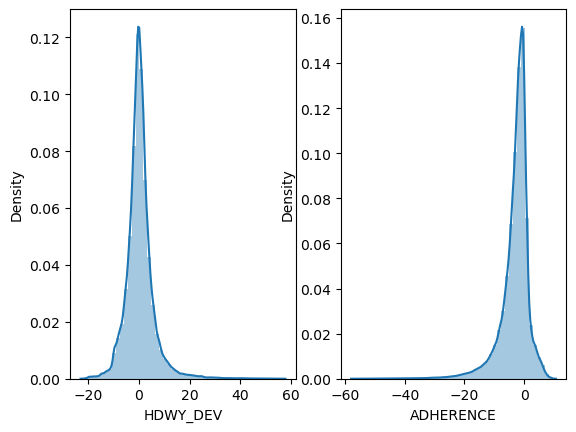

In [18]:
plt.subplot(1,2,1)
sns.distplot(wego['HDWY_DEV'])

plt.subplot(1,2,2)
sns.distplot(wego['ADHERENCE'])

plt.show()

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

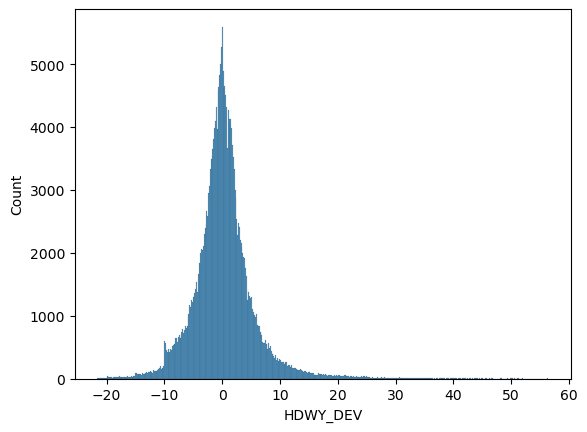

In [19]:
sns.histplot(data=wego, x="HDWY_DEV")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance', ylabel='Count'>

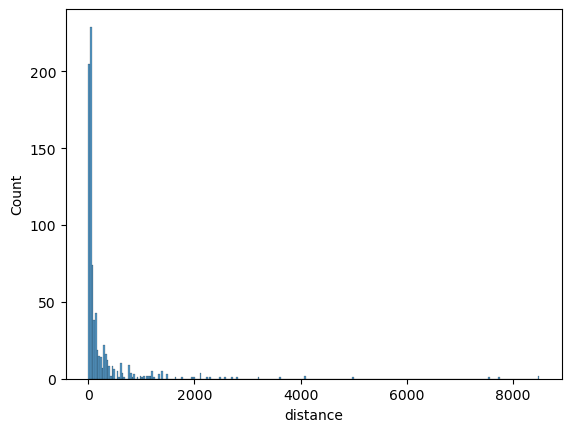

In [20]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

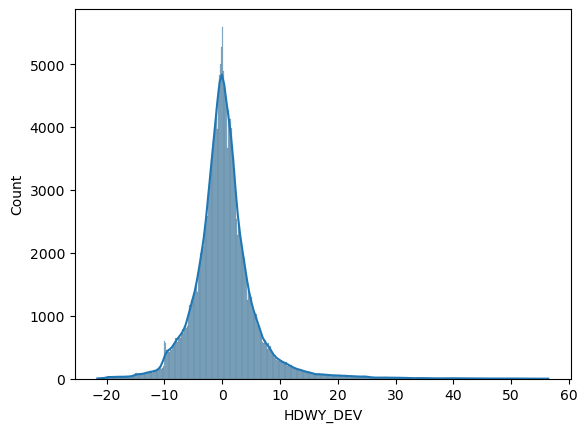

In [21]:
sns.histplot(data=wego, x="HDWY_DEV", kde=True)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADHERENCE', ylabel='Count'>

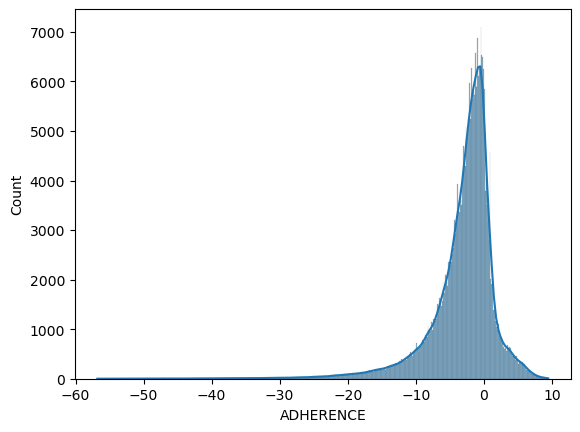

In [22]:
sns.histplot(data=wego, x="ADHERENCE", kde=True)

<Axes: ylabel='HDWY_DEV'>

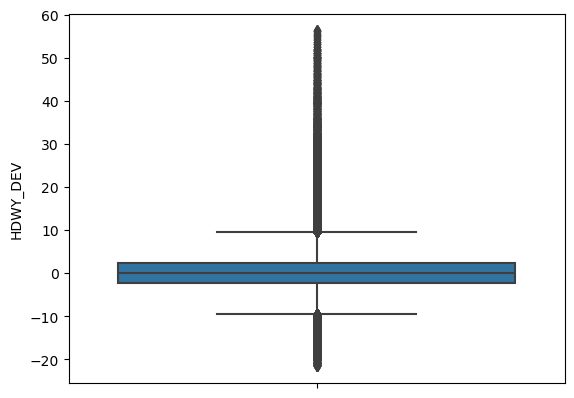

In [23]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

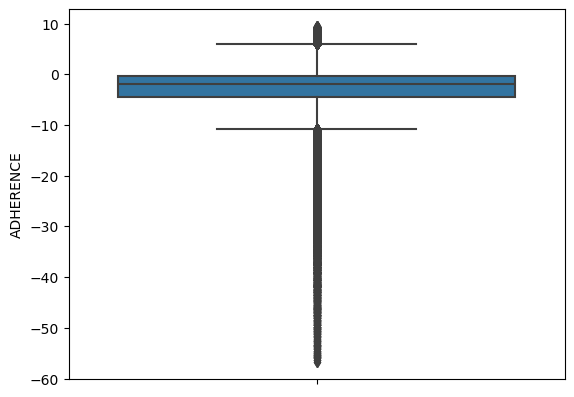

In [24]:
sns.boxplot( y=wego['ADHERENCE'])

In [25]:
# create headway deviation % column and bunching/gapping, acceptable range for each trip, is within range 1/0

In [26]:
# del wego['BUNCHING_OR_GAPPING']

In [81]:
wego['HEADWAY_DEVIATION_PERCENTAGE'] = round((wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100,2)



wego['HEADWAY_IS_BUNCHING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       < -50, '1','0')
wego['HEADWAY_IS_ACCEPTABLE'] = np.where((wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       >= -50)&(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       <= 50), '1','0')
wego['HEADWAY_IS_GAPPING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       > 50, '1','0')

In [28]:
wego.head(500)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HEADWAY_DEVIATION_PERCENTAGE,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.62,0,1,0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.62,0,1,0
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.22,0,1,0


In [85]:
wego['HEADWAY_IS_BUNCHING'] = wego['HEADWAY_IS_BUNCHING'].astype(float)
wego['HEADWAY_IS_ACCEPTABLE'] = wego['HEADWAY_IS_ACCEPTABLE'].astype(float)
wego['HEADWAY_IS_GAPPING'] = wego['HEADWAY_IS_GAPPING'].astype(float)

In [86]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   CALENDAR_ID                   333927 non-null  int64         
 1   SERVICE_ABBR                  333927 non-null  int64         
 2   ADHERENCE_ID                  333927 non-null  int64         
 3   DATE                          333927 non-null  object        
 4   ROUTE_ABBR                    333927 non-null  int64         
 5   BLOCK_ABBR                    333927 non-null  int64         
 6   OPERATOR                      333927 non-null  int64         
 7   TRIP_ID                       333927 non-null  int64         
 8   OVERLOAD_ID                   333927 non-null  int64         
 9   ROUTE_DIRECTION_NAME          333927 non-null  object        
 10  TIME_POINT_ABBR               333927 non-null  object        
 11  ROUTE_STOP_SEQUENC

In [30]:
wego[['HEADWAY_IS_BUNCHING','HEADWAY_IS_ACCEPTABLE','HEADWAY_IS_GAPPING']].value_counts().sort_values().reset_index()

,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,count
0,1,0,0,17243
1,0,0,1,20562
2,0,0,0,72640
3,0,1,0,223482


In [31]:
# wego[wego['SCHEDULED_HDWY']==1e-10]

In [32]:
# wego['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')

# Q2

In [33]:
total = wego['ROUTE_DIRECTION_NAME'].value_counts().reset_index()
total

,ROUTE_DIRECTION_NAME,count
0,FROM DOWNTOWN,176992
1,TO DOWNTOWN,156935


In [34]:
# 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
on_time = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
on_time

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,count
0,TO DOWNTOWN,1,133661
1,FROM DOWNTOWN,1,133139
2,FROM DOWNTOWN,0,43853
3,TO DOWNTOWN,0,23274


In [35]:
early = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_EARLY_COUNT']].value_counts().reset_index()
early

,ROUTE_DIRECTION_NAME,ADJUSTED_EARLY_COUNT,count
0,FROM DOWNTOWN,0,171880
1,TO DOWNTOWN,0,152605
2,FROM DOWNTOWN,1,5112
3,TO DOWNTOWN,1,4330


In [36]:
late = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_LATE_COUNT']].value_counts().reset_index()
late

,ROUTE_DIRECTION_NAME,ADJUSTED_LATE_COUNT,count
0,FROM DOWNTOWN,0,138251
1,TO DOWNTOWN,0,137991
2,FROM DOWNTOWN,1,38741
3,TO DOWNTOWN,1,18944


In [37]:
print(str(round(((on_time['count'].iloc[0])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were on time.')
print(str(round(((on_time['count'].iloc[1])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were on time.')
print('')
print(str(round(((early['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were early.')
print(str(round(((early['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were early.')
print('')
print(str(round(((late['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were late.')
print(str(round(((late['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were late.')

85.17% of (to downtown) trips were on time.
75.22% of (from downtown) trips were on time.

2.76% of (to downtown) trips were early.
2.89% of (from downtown) trips were early.

12.07% of (to downtown) trips were late.
21.89% of (from downtown) trips were late.


In [38]:
# initialize list of lists
data = [['To Downtown', 85.17, 'On Time'],
        ['To Downtown', 2.76, 'Early'],
        ['To Downtown', 12.07, 'Late'],
        ['From Downtown', 75.22, 'On Time'],
        ['From Downtown', 2.89, 'Early'],
        ['From Downtown', 21.89, 'Late']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Direction of Travel', 'Percent', 'On Time Performance'])
 
# print dataframe.
df

,Direction of Travel,Percent,On Time Performance
0,To Downtown,85.17,On Time
1,To Downtown,2.76,Early
2,To Downtown,12.07,Late
3,From Downtown,75.22,On Time
4,From Downtown,2.89,Early
5,From Downtown,21.89,Late


<Axes: xlabel='On Time Performance', ylabel='Percent'>

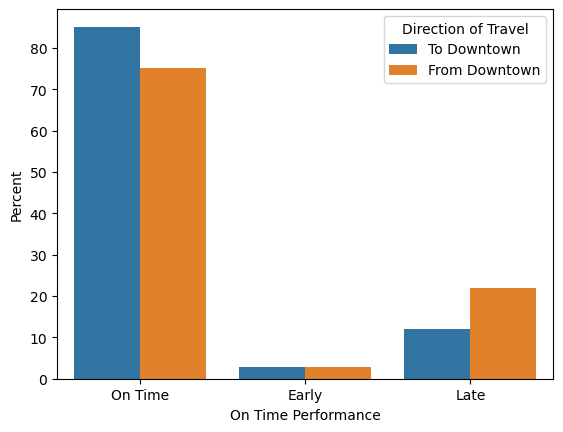

In [39]:
sns.barplot(df, x='On Time Performance', y='Percent', hue='Direction of Travel')

In [40]:


wego.groupby('ROUTE_DIRECTION_NAME')['HEADWAY_DEVIATION_PERCENTAGE'].agg(['min', 'mean', 'max'])

,min,mean,max
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,-100.0,3.037188,2417.50
TO DOWNTOWN,-100.0,2.028317,551.39


In [41]:
print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
print('')
print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']}))

                     HEADWAY_DEVIATION_PERCENTAGE                   
                                              min      max      mean
ROUTE_DIRECTION_NAME                                                
FROM DOWNTOWN                              -100.0  2417.50  3.037188
TO DOWNTOWN                                -100.0   551.39  2.028317

                      ADHERENCE                    
                            min       max      mean
ROUTE_DIRECTION_NAME                               
FROM DOWNTOWN        -56.800000  9.466666 -3.839260
TO DOWNTOWN          -56.366666  9.466666 -2.236034


In [79]:
# wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']}).agg({'HDWY_DEV': ['mean']})
round(wego.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HEADWAY_DEVIATION_PERCENTAGE', 'mean'), Bunching=('HEADWAY_IS_BUNCHING', 'mean')),2).reset_index()
# print('')
# wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']})
# sns.barplot(df2, x='ROUTE_ABBR', y='HDWY_DEV')

TypeError: agg function failed [how->mean,dtype->object]

In [43]:
# initialize list of lists
data2 = [['3', 0.54, 'Headway Deviation Percentage'],
        ['3', -3.71, 'Adherence'],
        ['7', 0.33, 'Headway Deviation Percentage'],
        ['7', -3.48, 'Adherence'],
        ['22', 0.57, 'Headway Deviation Percentage'],
        ['22', -1.07, 'Adherence'],
        ['23', 0.82, 'Headway Deviation Percentage'],
        ['23', -1.64, 'Adherence'],
        ['50', 0.17, 'Headway Deviation Percentage'],
        ['50', -2.42, 'Adherence'],
        ['52', 0.71, 'Headway Deviation Percentage'],
        ['52', -3.73, 'Adherence'],
        ['55', 0.19, 'Headway Deviation Percentage'],
        ['55', -4.62, 'Adherence'],
        ['56', 0.12, 'Headway Deviation Percentage'],
        ['56', -2.65, 'Adherence']]
# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns=['Route', 'Mean', 'Metric'])
 
# print dataframe.
df2

,Route,Mean,Metric
0,3,0.54,Headway Deviation Percentage
1,3,-3.71,Adherence
2,7,0.33,Headway Deviation Percentage
3,7,-3.48,Adherence
4,22,0.57,Headway Deviation Percentage
5,22,-1.07,Adherence
6,23,0.82,Headway Deviation Percentage
7,23,-1.64,Adherence
8,50,0.17,Headway Deviation Percentage
9,50,-2.42,Adherence


<Axes: xlabel='Route', ylabel='Mean'>

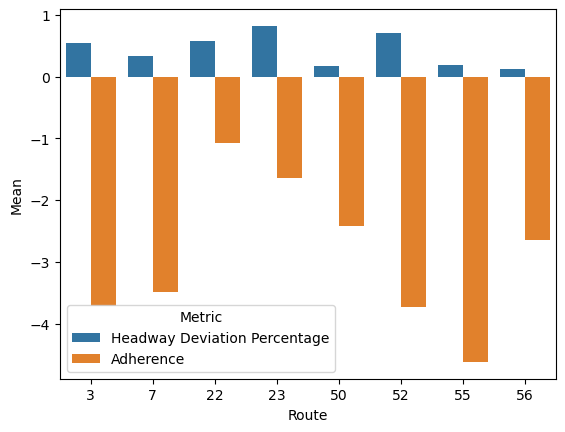

In [44]:
sns.barplot(df2, x='Route', y='Mean', hue='Metric')

In [45]:
print(wego.groupby(by='ROUTE_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
print('')
print(wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

           HEADWAY_DEVIATION_PERCENTAGE                   
                                    min      max      mean
ROUTE_ABBR                                                
3                               -100.00  2417.50  5.001760
7                                -99.67   551.39  2.005780
22                               -99.44   322.64  2.558967
23                               -99.86   285.56  4.361770
50                               -99.89   282.33  0.888637
52                              -100.00   449.05  3.181123
55                              -100.00   616.67  1.991291
56                              -100.00   286.17  1.093891

            ADHERENCE                    
                  min       max      mean
ROUTE_ABBR                               
3          -56.800000  9.416666 -3.712123
7          -56.366666  9.216666 -3.482662
22         -55.766666  9.466666 -1.065802
23         -53.516666  9.466666 -1.643933
50         -56.050000  9.233333 -2.424212
52         -56

In [46]:
print(wego.groupby(by='TIME_POINT_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
print('')
print(wego.groupby(by='TIME_POINT_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

                HEADWAY_DEVIATION_PERCENTAGE                    
                                         min      max       mean
TIME_POINT_ABBR                                                 
21BK                                  -99.67   551.39   2.402032
25ACLARK                              -55.13   125.23   1.795744
28&CHARL                              -99.89   244.00   0.824473
ARTS                                     NaN      NaN        NaN
BRCJ                                  -99.17  2417.50   9.828594
CH46                                  -99.89   262.00   0.900575
CLFF                                  -52.22   183.67   7.646605
CRES                                     NaN      NaN        NaN
CV23                                  -98.46   322.64   2.750121
DCSCC                                 -97.19   328.75  29.574717
DKTL                                  -99.31   220.56   4.248286
DWMRT                                 -99.44   216.46   3.184712
EDBC                     

# Q3

### How does time of day or day of week affect headway and on-time performance?

In [100]:
# # On-time Performance

# round((wego
# .assign(Day = wego['SCHEDULED_TIME'].dt.day_name()).groupby('Day')
# ['ADJUSTED_ONTIME_COUNT'].mean()*100),1).reset_index()

wego.assign(Day = wego['SCHEDULED_TIME'].dt.day_name()).groupby('Day')[['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE']].mean().reset_index()

,Day,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE
0,Friday,0.070485,0.082774,0.629906
1,Monday,0.046149,0.051011,0.687964
2,Saturday,0.024413,0.034700,0.718502
3,Sunday,0.015587,0.031629,0.727180
4,Thursday,0.061209,0.073012,0.649573
5,Tuesday,0.056015,0.065336,0.662982
6,Wednesday,0.059536,0.066872,0.657170


In [47]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = 'mixed')

In [107]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['day'])
 ['HEADWAY_DEVIATION_PERCENTAGE']
 .agg(['mean'])
).sort_values('mean', ascending=False)

# Averages for all days indicate a tendancy toward gapping - related to adherence
# The smallest average gapping values are occuring on Mondays and Saturdays
# The largest average gapping values occur on Thursdays and Fridays

,mean
day,
Friday,3.526941
Thursday,3.190682
Sunday,2.473504
Wednesday,2.423469
Tuesday,2.414493
Saturday,1.832941
Monday,1.661283


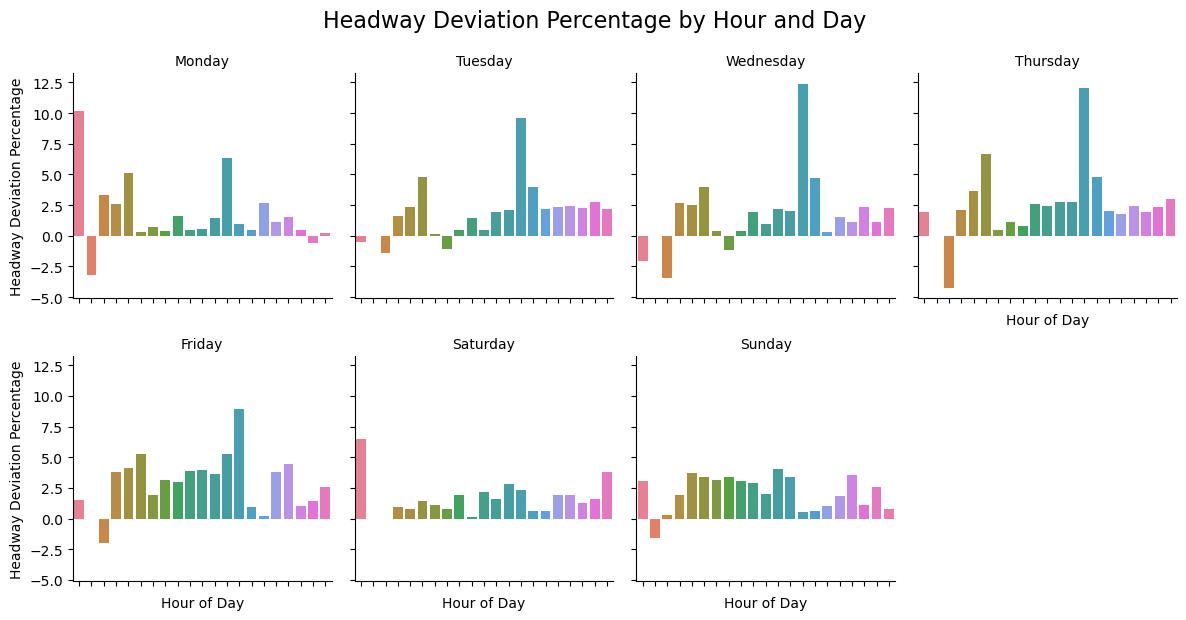

In [53]:
# Creating dataframe to look at headway deviation perc by day and hour
dh = wego.assign(day = wego['SCHEDULED_TIME'].dt.day_name()).assign(hour = wego['SCHEDULED_TIME'].dt.hour).groupby(['day','hour'])['HEADWAY_DEVIATION_PERCENTAGE'].mean().reset_index()

# Graphing this data with Seaborn

# Defining the order of days of the week
days_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Creating the FacetGrid
g = sns.FacetGrid(dh, 
                  col="day", 
                  col_order=days_of_week_order, 
                  col_wrap=4)
g.map_dataframe(sns.barplot, 
                x="hour", 
                y="HEADWAY_DEVIATION_PERCENTAGE", 
                palette='husl')

# Fine Tuning
g.fig.suptitle("Headway Deviation Percentage by Hour and Day", fontsize=16, y=1.05)
g.set_axis_labels("Hour of Day", "Headway Deviation Percentage")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

# Show the plot
plt.show()

In [ ]:
(wego
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .groupby(['hour'])
 ['HEADWAY_DEVIATION_PERCENTAGE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# The largest average bunching values are occuring at 4am and 1am
# the largest average gapping values occur at 7am and 3pm

In [55]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['day'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# Averages for all days indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring on Mondays and Sundays
# the largest average late values occur on Fridays and Saturdays

,mean,std,median,max,sum
day,,,,,
Friday,-3.692639,5.637897,-2.350000,9.266666,-203113.604928
Saturday,-3.347112,5.445192,-2.166666,9.416666,-119414.908930
Thursday,-3.338955,5.439898,-2.083333,9.300000,-185305.305113
Wednesday,-3.186093,5.094743,-2.050000,9.466666,-179383.405147
Tuesday,-2.935254,4.519801,-2.000000,9.433333,-164383.005180
Sunday,-2.423951,4.781963,-1.550000,9.466666,-69203.794716
Monday,-2.337847,4.058020,-1.650000,9.466666,-109626.341186


In [ ]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['hour'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# Averages for all hours indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring at 4am and 5am
# the largest average late values occur at 4pm and 5pm